# 第7章 ニューラルネットワーク・ディープラーニング

# 7.1 ニューロンモデル

### 7.1.1 神経細胞

### 7.1.2 ニューロンモデル

## 7.2 ニューラルネットワークモデル

### 7.2.1 2層フィードフォワードニューラルネット

### 7.2.2 2層フィードフォワードニューラルネットの実装

In [1]:
# -- リスト 7-1-(1)
import numpy as np

# データ生成 ----------
np.random.seed(seed=1)                # 乱数を固定
N = 200                               # データの数
K = 3                                 # 分布の数
T = np.zeros((N, 3), dtype=np.uint8)  # 空のTを準備
X = np.zeros((N, 2))                  # 空のXを準備
X0_min, X0_max = -3, 3                # X0の範囲、表示用
X1_min, X1_max = -3, 3                # X1の範囲、表示用
prm_mu = np.array([[-0.5, -0.5], [0.5, 1.0], [1, -0.5]])   # 分布の中心
prm_sig = np.array([[0.7, 0.7], [0.8, 0.3], [0.3, 0.8]])   # 分布の分散
prm_pi = np.array([0.4, 0.8, 1])       # 各分布への割合を決めるパラメータ
for n in range(N):
    r = np.random.rand() #０〜１でランダムな数字を生成
    # 3クラス用の目標データTを作成
    for k in range(K):
        if r < prm_pi[k]:  #生成したrがprm_pi(0.4, 0.8, 1)の小さい方から比較して行ってrより大きくなったらそのkを使って、T[n,k]に１を代入する
            T[n, k] = 1
            break
    # Tに対して入力データXを作成
    for k in range(2):
        X[n, k] =  \
            np.random.randn() * prm_sig[T[n, :] == 1, k] \
           + prm_mu[T[n, :] == 1, k] #T[n, :]==1でtrueの場所だけ、列kについてprm_sigから値を取り出す
print(T)
print(X)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 

/var/folders/2n/k04q38yx087g0pz_q6w7gfd40000gn/T/ipykernel_26526/3108659248.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] =  \


In [3]:
# リスト 7-1-(2)
# 訓練データとテストデータに分割 ----------
TrainingRatio = 0.5
N_training = int(N * TrainingRatio) #N_training = 100
X_train = X[:N_training, :]
X_test = X[N_training:, :]
T_train = T[:N_training, :]
T_test = T[N_training:, :]

# データの保存 ----------
np.savez(
    "ch7_data.npz",
    X_train=X_train, T_train=T_train, X_test=X_test, T_test=T_test,
    X0_min=X0_min, X0_max=X0_max, X1_min=X1_min, X1_max=X1_max,
)

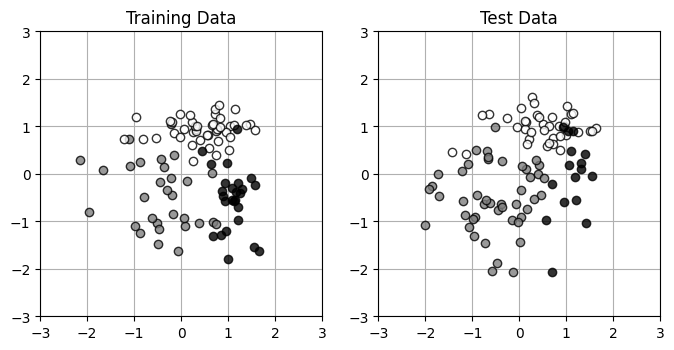

In [5]:
# リスト 7-1-(3)
%matplotlib inline
import matplotlib.pyplot as plt

# データ表示 ----------
def show_data(x, t):
    K = t.shape[1]  # shape[1]はtの列数からクラス数を取得、shape[0]は行数
    col = ["gray", "white", "black"]
    for k in range(K):
        plt.plot(
            x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], col[k], #１が入っている列ごと(0,1,2)に色を分ける(gray, white, black) 
            marker="o", linestyle="None",                   # x[t[:, k] == 1, 0]　tのk行目が1になっている行を探し、xの0行目の値をプロットする
            markeredgecolor="black", alpha=0.8,
        )
    plt.xlim(X0_min, X0_max)
    plt.ylim(X1_min, X1_max)

# メイン ----------
plt.figure(figsize=(8, 3.7))
# 訓練データ表示
plt.subplot(1, 2, 1)
show_data(X_train, T_train)
plt.title("Training Data")
plt.grid()
# テストデータ表示
plt.subplot(1, 2, 2)
show_data(X_test, T_test)
plt.title("Test Data")
plt.grid()
plt.show()

In [7]:
# リスト 7-1-(4)
# シグモイド関数 ----------
def sigmoid(a):
    y = 1 / (1 + np.exp(-a))  # 式7-6
    return y

# ネットワーク  ----------
def FNN(wv, M, K, x):
    N, D = x.shape  # 入力次元 Nは行数、Dは列数　　　｜今回 N=200, D=2(ダミーニューロン以外), M=2, K=3
    w = wv[: M * (D + 1)]     # 中間層ニューロンへの重み　　｜　w=wv[:2*3]=[0-5]  wv=2*3+3*3=15  
    w = w.reshape(M, (D + 1)) #　今回　2行3列に変形 w=[1,1,1],[1,1,1]
    v = wv[M * (D + 1) :]     # 出力層ニューロンへの重み 　｜　v=wv[2*3:]=[6-14]
    v = v.reshape((K, M + 1)) #　今回　3行3列  v=[1,1,1],[1,1,1],[1,1,1]
    b = np.zeros((N, M + 1))  # 中間層ニューロンの入力総和 　｜　200行、3列
    z = np.zeros((N, M + 1))  # 中間層ニューロンの出力　　｜　200行、3列
    a = np.zeros((N, K))      # 出力層ニューロンの入力総和　　｜　200行、3列
    y = np.zeros((N, K))      # 出力層ニューロンの出力　　｜　200行、3列
    for n in range(N):    # | 0-n-199
        # 式7-14、式7-15で中間層の出力zを計算
        for m in range(M):  #  | 0-m-1
            # (A) x[n, :]の末尾に1を加える np.r_
            x_add1 = np.r_[x[n, :], 1] #x_add1:N行、3列、ただしforの時は1行ずつ計算（１次元ベクトル3行1列）
            b[n, m] = w[m, :] @ x_add1 #中間層の入力総和　b:200行, 2列
            z[n, m] = sigmoid(b[n, m]) #中間層の出力     z:200行, 2列
        # 式7-16、式7-17で出力層の出力yを計算
        z[n, M] = 1  # ダミーニューロン 
        u = 0
        for k in range(K): # 0-k-2
            a[n, k] = v[k, :] @ z[n, :] #計算時、vは1行3列、zは3行1列　出力層の入力総和
            u = u + np.exp(a[n, k]) #ソフトマックス関数で使用する分母を作成
        for k in range(K): #0-k-2
            y[n, k] = np.exp(a[n, k]) / u
    return y, a, z, b #y:出力層の出力、a:出力層の入力総和、z:中間層の出力、b:中間層の入力総和

# テスト ----------　#wvは1が15個なので中間層と出力層の入力総和が行間で同じになってしまうため、yが同じになっている
wv = np.ones(15) 
M, K = 2, 3
y, a, z, b = FNN(wv, M, K, X_train[:2, :])
print("y =\n", np.round(y, 6))
print("a =\n", np.round(a, 6))
print("z =\n", np.round(z, 6))
print("b =\n", np.round(b, 6))

y =
 [[0.333333 0.333333 0.333333]
 [0.333333 0.333333 0.333333]]
a =
 [[2.697184 2.697184 2.697184]
 [1.491726 1.491726 1.491726]]
z =
 [[0.848592 0.848592 1.      ]
 [0.245863 0.245863 1.      ]]
b =
 [[ 1.723598  1.723598  0.      ]
 [-1.120798 -1.120798  0.      ]]


### 7.2.3 数値微分法

In [10]:
# リスト 7-1-(5)
# 平均交差エントロピー誤差 ----------
def cee_FNN(wv, M, K, x, t):
    N, D = x.shape  #N=200, D=2
    y, a, z, b = FNN(wv, M, K, x) #y:出力層の出力、a:出力層の入力総和、z:中間層の出力、b:中間層の入力総和
    # (A) 式7-18の計算
    cee = -(t.reshape(-1) @ np.log(y.reshape(-1))) / N  #reshape(-1)は行ベクトル
    return cee

# テスト ----------
wv = np.ones(15)
M, K = 2, 3
cee = cee_FNN(wv, M, K, X_train[:2, :], T_train[:2, :])
print(f"cee = {cee:.6}")

cee = 1.09861


numerical dwv
dwv =
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]


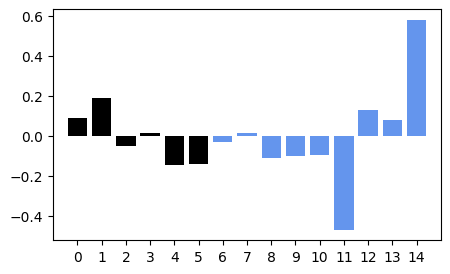

In [12]:
# リスト 7-1-(6)
# 平均交差エントロピー誤差の数値微分 ----------
def dcee_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv) #np.zerosだとfloat64, np.zeros_likeだとint32
    # 式7-20の計算
    for iwv in range(len(wv)): #0-iwv-14
        wv_shifted = wv.copy() 
        wv_shifted[iwv] = wv[iwv] + epsilon #wvにepsilonを加えている
        mse1 = cee_FNN(wv_shifted, M, K, x, t)
        wv_shifted[iwv] = wv[iwv] - epsilon #wvにepsilonを加えている
        mse2 = cee_FNN(wv_shifted, M, K, x, t)
        dwv[iwv] = (mse1 - mse2) / (2 * epsilon)
    return dwv

# -- dwvの棒グラフによる表示 ----------
def show_dwv(dwv, D, M):
    v_start = M * (D + 1)     # v の始めのインデックス  v_start=2*3=6 
    v_end = dwv.shape[0] - 1  # v の最後のインデックス  v_end:dwvの行数-1  | 14
    plt.bar(  # dwの表示
        range(0, v_start), dwv[:v_start], #0-range-5, dmv[0-5]
        color="black", align="center",
    )
    plt.bar(  # dvの表示
        range(v_start, v_end + 1), dwv[v_start:], #6-range-1, dmv[6-15]
        color="cornflowerblue", align="center",
    )
    plt.xticks(range(0, v_end + 1))
    plt.xlim(-1, v_end + 1) # -1~15

# テスト ----------
D, M, K, N = 2, 2, 3, 2
wv_n = M * (D + 1) + K * (M + 1) # wv_n=2*3+3*3=15 
np.random.seed(seed=1)
wv = np.random.normal(
    0.0, 1.0, wv_n)  # 平均0.0,分散1.0のwv_n個の乱数
dwv = dcee_FNN_num(
    wv, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dwv")
print("dwv =\n", np.round(dwv, 6))

# グラフ描画 ----------
plt.figure(figsize=(5, 3))
show_dwv(dwv, D, M)
plt.show()

### 7.2.4 数値微分法による勾配法

In [15]:
# リスト 7-1-(7)
import time  #計算時間を計測するために使用

# 数値微分を使った勾配法 -------
def fit_FNN_num(
    wv_init, M, K,
    x_train, t_train, x_test, t_test,
    tau_max, alpha,
): #wv_init:学習される最初の重み、tau_max:学習ステップ、alpha:学習定数
    
    # 訓練データの誤差の履歴保存用
    cee_train = np.zeros(tau_max)
    # テストデータの誤差の履歴保存用
    cee_test = np.zeros(tau_max)
    # wv の履歴保存用
    wv = np.zeros((tau_max, len(wv_init)))
    # wv の初期値をセットし、そのときの誤差を計算
    wv[0, :] = wv_init # wvの0行目にwv_initを代入
    cee_train[0] = cee_FNN(wv_init, M, K, x_train, t_train) 
    cee_test[0] = cee_FNN(wv_init, M, K, x_test, t_test)
    # 勾配法
    for tau in range(tau_max - 1):  # (A)
        dcee = dcee_FNN_num(wv[tau, :], M, K, x_train, t_train) # 平均交差エントロピー誤差の数値微分
        wv[tau + 1, :] = wv[tau, :] - alpha * dcee
        cee_train[tau + 1] = \
            cee_FNN(wv[tau + 1, :], M, K, x_train, t_train)
        cee_test[tau + 1] = \
            cee_FNN(wv[tau + 1, :], M, K, x_test, t_test)
    wv_final = wv[-1, :] # wv[-1, :]はwvの最後の行
    return wv_final, wv, cee_train, cee_test #wv_final:最終的な重み 
    
# メイン ----------
start_time = time.time()
D, M, K = 2, 2, 3
wv_n = M * (D + 1) + K * (M + 1)
np.random.seed(seed=1)
wv_init = np.random.normal(0, 0.01, wv_n)  # wvの初期値
tau_max = 1000  # (B) 学習ステップ default:1000
alpha = 0.5
# 勾配法でwvを計算
wv, wv_hist, cee_train, cee_test = \
    fit_FNN_num(
        wv_init, M, K,
        X_train, T_train, X_test, T_test,
        tau_max, alpha,
    )
# 計算時間の表示
calculation_time = time.time() - start_time
print(f"Calculation time:{calculation_time:.2f} sec")

Calculation time:45.69 sec


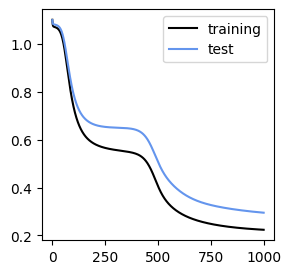

In [16]:
# リスト 7-1-(8)
# 学習誤差の表示 ----------
plt.figure(figsize=(3, 3))
plt.plot(cee_train, "black", label="training")
plt.plot(cee_test, "cornflowerblue", label="test")
plt.legend()
plt.show()

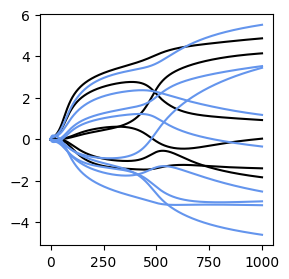

In [17]:
# リスト 7-1-(9)
# 重みの時間発展の表示 ----------
plt.figure(figsize=(3, 3))
v_start = M * (D + 1)  # v の始めのインデックス v_start=2*3=6 
plt.plot(wv_hist[:, :v_start], "black") #中間層の重み
plt.plot(wv_hist[:, v_start:], "cornflowerblue") #出力層の重み
plt.show()

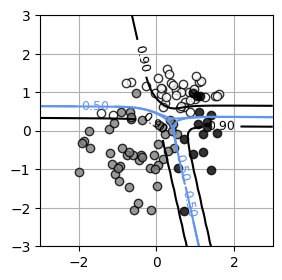

In [18]:
# リスト 7-1-(10)
# 境界線表示関数 ----------
def show_FNN(wv, M, K):
    x0_n, x1_n = 60, 60  # 等高線表示の解像度
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    # xx0とxx1を1次元ベクトルに展開し、
    # それぞれを0列目と1行目に配置した行列xを作る
    x = np.c_[xx0.reshape(-1), xx1.reshape(-1)] #行方向(横)に結合する
    # 行列xに対するyを一度に求める
    y, a, z, b = FNN(wv, M, K, x) #y:出力層の出力、a:出力層の入力総和、z:中間層の出力、b:中間層の入力総和
    for ic in range(K): #0-ic-2
        f = y[:, ic]
        f = f.reshape(x1_n, x0_n)
        cont = plt.contour(  # 等高線表示
            xx0, xx1, f,
            levels=[0.5, 0.9], colors=["cornflowerblue", "black"],
        )
        cont.clabel(fmt="%.2f", fontsize=9)
    plt.xlim(X0_min, X0_max)
    plt.ylim(X1_min, X1_max)

# 境界線の表示 ----------
plt.figure(figsize=(3, 3))
show_data(X_test, T_test)
show_FNN(wv, M, K) #wv=15, M=2, K=3
plt.grid()
plt.show()

### 7.2.5 誤差逆伝搬法（バックプロパゲーション）

### 7.2.6 $\partial E / \partial v_{kj}$ を求める

### 7.2.7 $\partial E/\partial w_{ji}$ を求める

### 7.2.8 誤差逆伝搬法の実装

analytical dwv
dwv =
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]
numerical dwv
dwv =
 [ 0.088481  0.19158  -0.051398  0.012815 -0.14468  -0.142428 -0.02992
  0.013513 -0.111156 -0.101044 -0.09428  -0.468556  0.130964  0.080766
  0.579713]


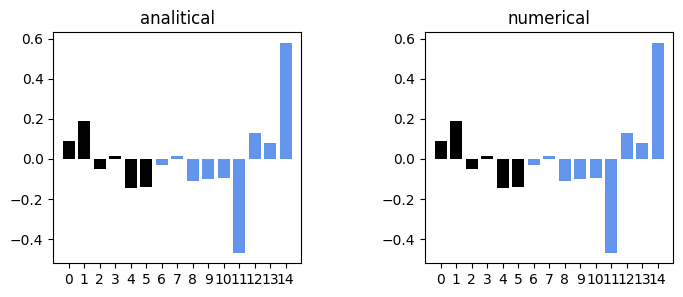

In [25]:
# リスト 7-1-(11)
# -- 解析的微分 ----------
def dcee_FNN(wv, M, K, x, t):
    N, D = x.shape #N=200, D=2
    # wv を w と v に戻す
    v_start = M * (D + 1) #v_start= 2*3=6 
    w = wv[:v_start] # w=wv[:6]
    w = w.reshape(M, D + 1) #w=[0,1,2],[3,4,5]
    v = wv[v_start:] #v=wv[6:]
    v = v.reshape(K, M + 1) #v=[6,7,8],[9,10,11],[12,13,14]
    # ① 入力xを入れて出力yを得る
    y, a, z, b = FNN(wv, M, K, x) #y:出力層の出力、a:出力層の入力総和、z:中間層の出力、b:中間層の入力総和
    # 出力変数の準備
    dwv = np.zeros_like(wv) #dwv:1が15個
    dw = np.zeros((M, D + 1)) #dw=[0,0,0],[0,0,0]
    dv = np.zeros((K, M + 1)) #dv=[0,0,0],[0,0,0],[0,0,0] [class1への重み, class2への重み, class3への重み] * 3ニューロン
    delta1 = np.zeros(M)  # 1 層目誤差 delta1:2個の0
    delta2 = np.zeros(K)  # 2 層目誤差 (k=0 の部分は使わず) delta2:3個の0
    for n in range(N):  # (A) 0-n-199
        # ② 2層（出力層）の誤差を得る
        for k in range(K): # 0-k-2
            delta2[k] = y[n, k] - t[n, k] #delta2:各クラスの確率(y[n,0], y[n,1], y[n,2])と実際のクラスの値(0, 1)の差　(例)delta2[k]=[a] 0-k-2 合計３
        # ③ 1層（中間層）の誤差を得る
        for j in range(M): #0-j-1 (例)delta1[j]=[a] 0-k-1　合計２　　　v[:, j]:３つある
            delta1[j] = z[n, j] * (1 - z[n, j]) * v[:, j] @ delta2 #シグモイド関数の微分した形:z[n, j] * (1 - z[n, j])
        # ④ vの更新分（dv）を得る delta_v
        for k in range(K): #0-k-2　各中間ニューロンから同一クラスへの重みを更新
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N  # z[n, :]:3つ  dv[k,:]=[a,b] 0-k-2 合計9
        # ④ wの更新分（dw）を得る delta_w　各入力ニューロンから同一中間ニューロンへの重みを更新
        for j in range(M): #0-j-1
            x_add1 = np.r_[x[n, :], 1] #3列になった
            dw[j, :] = dw[j, :] + delta1[j] * x_add1 / N # dw[j,:]=[a,b,c] 0-j-1 合計６
    # dw と dv を合体させて dwv とする
    dwv = np.c_[
        dw.reshape((1, M * (D + 1))), #1行6列
        dv.reshape((1, K * (M + 1))), #1行9列
    ]
    dwv = dwv.reshape(-1) #行ベクトルに変換
    return dwv

# テスト ----------
D, M, K, N = 2, 2, 3, 2
wv_n = M * (D + 1) + K * (M + 1) #wv_n=15
np.random.seed(seed=1)
wv = np.random.normal(0.0, 1.0, wv_n) #平均0,標準偏差1の正規分布
dwv_ana = dcee_FNN(wv, M, K, X_train[:N, :], T_train[:N, :]) #解析的微分を用いてダウ出されたパラメーター
dwv_num = dcee_FNN_num(wv, M, K, X_train[:N, :], T_train[:N, :]) #平均交差エントロピー誤差の数値微分を用いて導出されたパラメーター
# 結果表示
print("analytical dwv")
print("dwv =\n", np.round(dwv_ana, 6))
print("numerical dwv")
print("dwv =\n", np.round(dwv_num, 6))

# グラフ描画 ----------
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
# 解析的微分
plt.subplot(1, 2, 1)
show_dwv(dwv_ana, D, M)
plt.title("analitical")
# 数値微分
plt.subplot(1, 2, 2)
show_dwv(dwv_num, D, M)
plt.title("numerical")
plt.show()

In [31]:
# リスト 7-1-(12)
# 解析的微分を使った勾配法 -------
def fit_FNN(
    wv_init, M, K,
    x_train, t_train, x_test, t_test,
    tau_max, alpha,
):
    # 訓練データの誤差の履歴保存用
    cee_train = np.zeros(tau_max) #1000個の0
    # テストデータの誤差の履歴保存用
    cee_test = np.zeros(tau_max)  #1000個の0
    # wv の履歴保存用
    wv = np.zeros((tau_max, len(wv_init))) #1000行、15列
    # wv の初期値をセットし、そのときの誤差を計算
    wv[0, :] = wv_init
    cee_train[0] = cee_FNN(wv_init, M, K, x_train, t_train) # 平均交差エントロピー誤差
    cee_test[0] = cee_FNN(wv_init, M, K, x_test, t_test) # 平均交差エントロピー誤差
    # 勾配法
    for tau in range(tau_max - 1): # 0-tau-998
        dcee = dcee_FNN(wv[tau, :], M, K, x_train, t_train)  # (A)解析的微分
        wv[tau + 1, :] = wv[tau, :] - alpha * dcee #wvの重みを変化させる
        cee_train[tau + 1] = \
            cee_FNN(wv[tau + 1, :], M, K, x_train, t_train) #練習データの平均交差エントロピー誤差を記録
        cee_test[tau + 1] = \
            cee_FNN(wv[tau + 1, :], M, K, x_test, t_test)  #テストデータの平均交差エントロピー誤差を記録
    wv_final = wv[-1, :]
    return wv_final, wv, cee_train, cee_test

# メイン ----------
start_time = time.time()
D, M, K = 2, 2, 3
wv_n = M * (D + 1) + K * (M + 1) #wv_n=2*3+3*3=15 
np.random.seed(seed=1)
wv_init = np.random.normal(0, 0.01, wv_n)  # wvの初期値 重みを平均0,標準偏差0.01の正規分布に従うサンプルを15個作る
tau_max = 1000  # (B) 学習ステップ
alpha = 0.5
# 勾配法でwvを計算 wv:パラメーターの重み, wv_hist:パラメーターの記録, cee_train:練習データの平均交差エントロピーの記録, cee_test:テストデータの平均交差エントロピーの記録
wv, wv_hist, cee_train, cee_test = \
    fit_FNN(
        wv_init, M, K,
        X_train, T_train, X_test, T_test,
        tau_max, alpha,
    )
# 計算時間の表示
calculation_time = time.time() - start_time
print(f"Calculation time:{calculation_time:.2f} sec")

Calculation time:6.07 sec


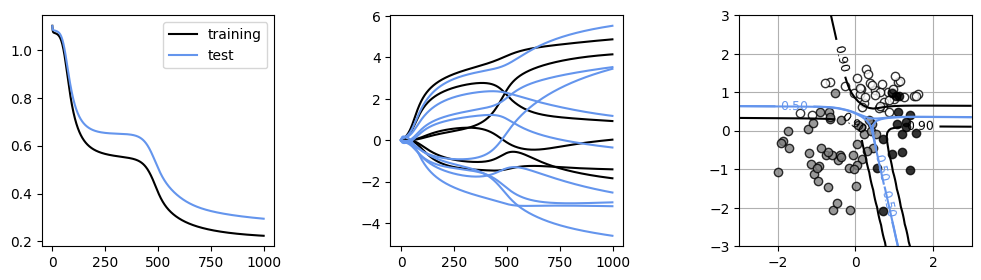

In [33]:
# リスト 7-1-(13)
D, M, K = 2, 2, 3
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 学習誤差の表示 ----------
plt.subplot(1, 3, 1)
plt.plot(cee_train, "black", label="training")
plt.plot(cee_test, "cornflowerblue", label="test")
plt.legend()

# 重みの時間発展の表示 ----------
plt.subplot(1, 3, 2)
v_start = M * (D + 1)  # v の始めのインデックス
plt.plot(wv_hist[:, :v_start], "black") #中間層のパラメーターの変化
plt.plot(wv_hist[:, v_start:], "cornflowerblue") #出力層のパラメーターの変化

# 境界線の表示 ----------
plt.subplot(1, 3, 3)
show_data(X_test, T_test) #T_testの中で1が入っている列を各行ごとに探して、xの値を色分けしてプロットする
show_FNN(wv, M, K)
plt.grid()
plt.show()

### 7.2.9 学習後のニューロンの特性

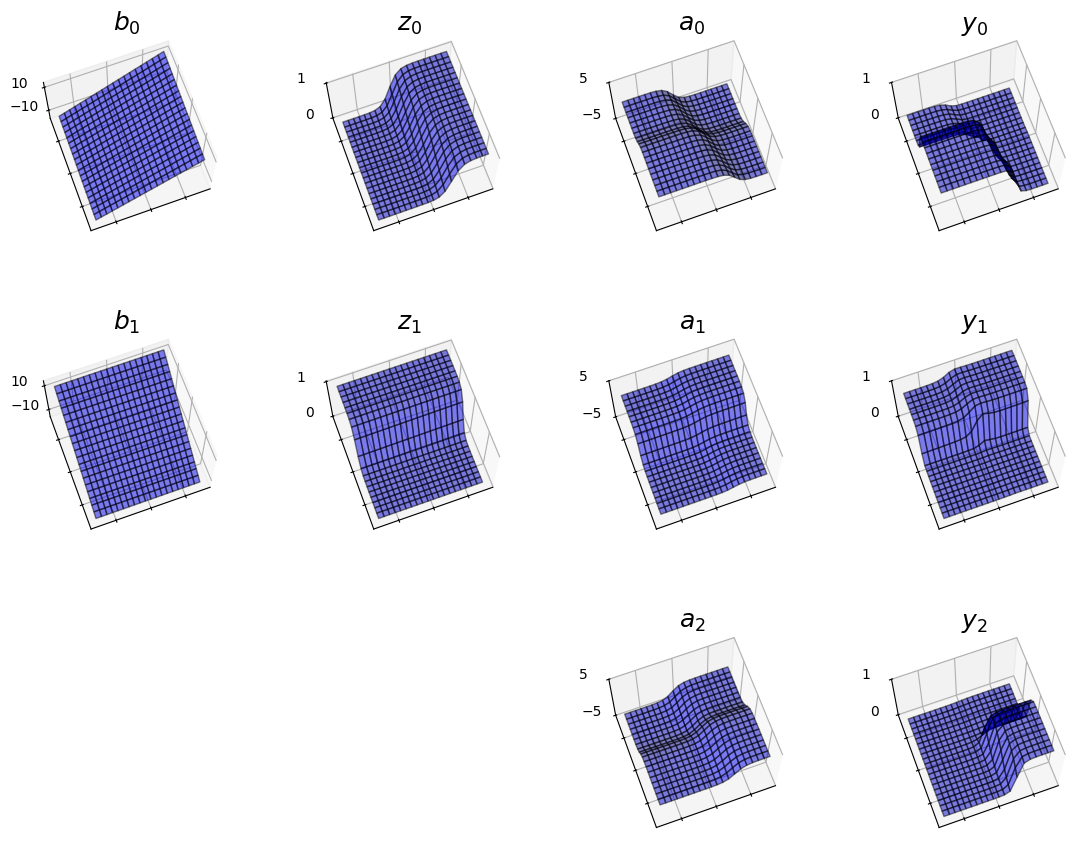

In [35]:
# リスト 7-1-(14)
# サーフェス表示関数 ----------
def show_activation3d(ax, xx0, xx1, f, f_ticks, title):
    x1_n, x0_n = xx0.shape
    f = f.reshape(x1_n, x0_n)
    ax.plot_surface(
        xx0, xx1, f,
        rstride=1, cstride=1, alpha=0.5, color="blue", edgecolor="black",
    )
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(f_ticks)
    ax.set_title(title, fontsize=18)

# メイン ----------
M, K = 2, 3
x0_n, x1_n = 20, 20  # 等高線表示の解像度
# 表示データの計算
x0 = np.linspace(X0_min, X0_max, x0_n) #-3~3を30分割
x1 = np.linspace(X1_min, X1_max, x1_n) #-3~3を30分割
xx0, xx1 = np.meshgrid(x0, x1) # xx0 = xx1 = 900の要素
x = np.c_[xx0.reshape(-1), xx1.reshape(-1)] #900行2列
y, a, z, b = FNN(wv, M, K, x)  #y:出力層の出力、a:出力層の入力総和、z:中間層の出力、b:中間層の入力総和
# グラフ描画
fig = plt.figure(figsize=(12, 9))
plt.subplots_adjust(
    left=0.075, bottom=0.05, right=0.95, top=0.95,
    wspace=0.4, hspace=0.4,
)
# b,zの表示
for m in range(M): #0-m-1
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection="3d") #figreを3*4分割した内の一番左の列
    show_activation3d(ax, xx0, xx1, b[:, m], [-10, 10], f"$b_{m:d}$") #中間層の入力総和の３次元グラフ
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection="3d") #figreを3*4分割した内の左から２番目の列
    show_activation3d(ax, xx0, xx1, z[:, m], [0, 1], f"$z_{m:d}$") #中間層の出力の３次元グラフ
# a,yの表示
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection="3d") #figreを3*4分割した内の右から２番目の列
    show_activation3d(ax, xx0, xx1, a[:, k], [-5, 5], f"$a_{k:d}$") #出力層の入力総和の３次元グラフ
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection="3d") #figreを3*4分割した内の一番右の列
    show_activation3d(ax, xx0, xx1, y[:, k], [0, 1], f"$y_{k:d}$") #出力層の出力の３次元グラフ
        
plt.show()

## 7.3 Keras でニューラルネットワークモデル

### 7.3.1 2層フィードフォワードニューラルネット

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
# リスト 7-2-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# データの load ----------
data = np.load("ch7_data.npz")
X_train = data["X_train"]
T_train = data["T_train"]
X_test = data["X_test"]
T_test = data["T_test"]
X0_min = data["X0_min"]
X0_max = data["X0_max"]
X1_min = data["X1_min"]
X1_max = data["X1_max"]

In [5]:
# リスト 7-2-(2) 
# データの図示 ----------
def show_data(x, t):
    K = t.shape[1]  # tの列数からクラス数を取得
    col = ["gray", "white", "black"]
    for k in range(K):
        plt.plot(
            x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], col[k],
            marker="o", linestyle="None",
            markeredgecolor="black", alpha=0.8,
        )
    plt.xlim(X0_min, X0_max)
    plt.ylim(X1_min, X1_max)

In [7]:
# リスト 7-2-(3)
import tensorflow
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tensorflow.random.set_seed(seed=0)  # 乱数の固定

# Sequentialモデルの作成 ----------
model = Sequential()  # (A) sequential modelはニューラルネットワークを構築する方法の一つ
model.add(Dense(units=2, input_dim=2, activation="sigmoid"))  # (B) 中間層の追加 unit:ニューロン数, input-dim:入力の次元数, activation:活性化関数
model.add(Dense(units=3, activation="softmax"))  # (C)

# 学習方法の設定 ----------
sgd = SGD(learning_rate=0.5)  # (D) 勾配法に対応 learning_rate:学習率 
model.compile(  # (E) optimizer:学習方法の設定, loss="categorical_crossentropy" 目的関数=交差エントロピー誤差, metrics=["accuracy"] 学習評価方法=正答率
    optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"]) #正答率：予測確率が最も高いクラスが全データの何割正解できたかという割合

# 学習 ----------
start_time = time.time()
history = model.fit(  # (F) epochs:全データを学習に使う回数,  X_train, T_train:訓練データの指定, batch_size: 1ステップ分の勾配を計算するのに使う学習データ数
    X_train, T_train, # verbose=0:学習進行状況を表示しない, validation_data=(X_test, T_test):評価用のデータの指定
    epochs=1000, batch_size=100, verbose=0,
    validation_data=(X_test, T_test),
)

# モデル評価 ---------- score[0]:テストデータの交差エントロピー誤差, score[1]:テストデータの正答率
score = model.evaluate(X_test, T_test, verbose=0)  # (G)model.evaluateで最終的な学習の評価値を出力
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"cross entropy {score[0]:.2f}, accuracy {score[1]:.2f}")
print(f"Calculation time:{calculation_time:.2f} sec")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cross entropy 0.27, accuracy 0.92
Calculation time:24.00 sec


### 7.3.2 Keras の使い方の流れ

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


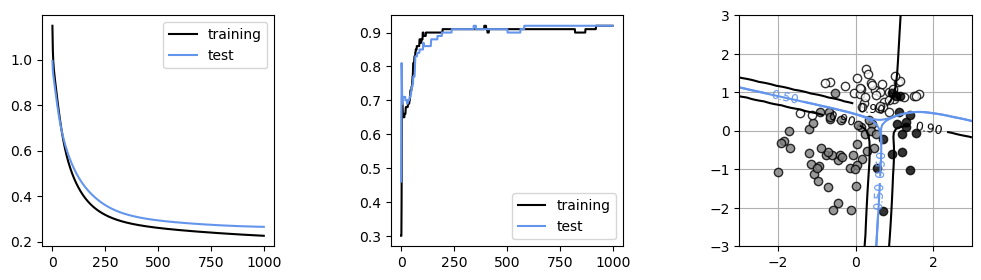

In [9]:
# リスト 7-2-(4)
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 学習曲線表示 ----------
plt.subplot(1, 3, 1) #1行3列の1つ目
# (A) 訓練データの誤差の表示
plt.plot(history.history["loss"], "black", label="training") #loss:目的変数(交差エントロピー誤差)
# (B) # テストデータの誤差の表示
plt.plot(history.history["val_loss"], "cornflowerblue", label="test") #val_loss:テストデータの交差エントロピー誤差
plt.legend()

# 精度表示 ----------
plt.subplot(1, 3, 2) #1行3列の2つ目
# (C) 訓練データの正答率の表示
plt.plot(history.history["accuracy"], "black", label="training")
# (D) テストデータの正答率の表示
plt.plot(history.history["val_accuracy"], "cornflowerblue", label="test")
plt.legend()

# 境界線表示 ----------
plt.subplot(1, 3, 3) #1行3列の3つ目
show_data(X_test, T_test)
x0_n, x1_n = 60, 60  # 等高線表示の解像度
# 表示データの計算
x0 = np.linspace(X0_min, X0_max, x0_n) #-3~3を60分割
x1 = np.linspace(X1_min, X1_max, x1_n) #-3~3を60分割
xx0, xx1 = np.meshgrid(x0, x1) #xx0,xx1:3600個の要素
x = np.c_[xx0.reshape(-1), xx1.reshape(-1)] #3600行2列
y = model.predict(x)  # (E) xに対するモデルの予測yを得る(Sequentialモデル) 3列
# 等高線表示
K = 3
for ic in range(K):# 0-ic-2
    f = y[:, ic]
    f = f.reshape(x1_n, x0_n) #meshgrid関数で作成した60行60列の状態に戻す
    cont = plt.contour(
        xx0, xx1, f,
        levels=[0.5, 0.9], colors=["cornflowerblue", "black"],
    )
    cont.clabel(fmt="%.2f", fontsize=9) #等高線上に数値を記入する
    plt.xlim(X0_min, X0_max)
    plt.ylim(X1_min, X1_max)
plt.grid()
plt.show()